In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号 

import scipy.interpolate as spip
# from scipy.optimize import 
from scipy.optimize import fsolve

path = 'dataresult/'

from math import log,floor

def string_result(x,dx,latex=False):
    #返回类型位字符串，latex变量选择是否返回LaTeX源码
    order_x=floor(log(abs(x))/log(10))
    order_dx=floor(log(abs(dx))/log(10))
    value_x=x/10**order_x
    value_dx=dx/10**order_dx
    delord=order_x-order_dx
    duobao=0
    if (value_dx<2):
        duobao=1
    
    value_dx=value_dx*10**(-delord)
    # order_x=log(x)/log(10)
    delord+=duobao
    value_x_show=f"{value_x:.{delord}f}"
    value_dx_show=f"{value_dx:.{delord}f}"

    if latex:
        return(f'$( {value_x_show}\\pm{value_dx_show} )\\times 10^{order_x}$')
    else:
        return(f'({value_x_show} ± {value_dx_show} )×10^{order_x}')

In [4]:
df = pd.read_excel('Data.xlsx')
df=df.sort_values(by='旋钮刻度')
df

,旋钮刻度,相对延迟/us,绝对延迟,符合计数,Unnamed: 4,刻度5处的绝对延迟,Unnamed: 6,5.12
0,0.00,-4.560,0.560,0.000000,NaN,NaN,NaN,NaN
1,1.00,-3.720,1.400,0.000000,NaN,NaN,NaN,NaN
2,2.00,-2.760,2.360,0.000000,NaN,NaN,NaN,NaN
3,3.00,-1.740,3.380,0.000000,NaN,NaN,NaN,NaN
4,4.00,-0.780,4.340,0.000000,NaN,NaN,NaN,NaN
6,4.25,-0.512,4.608,0.000000,NaN,NaN,NaN,NaN
8,4.29,-0.468,4.652,4.333333,4.0,4.0,5.0,NaN
7,4.30,-0.448,4.672,1827.000000,NaN,NaN,NaN,NaN
5,5.00,0.256,5.376,1827.000000,NaN,NaN,NaN,NaN
10,5.20,0.450,5.570,1827.000000,NaN,NaN,NaN,NaN


In [5]:
scale = df['旋钮刻度'].values
delay = df['绝对延迟'].values
delay_re = df['相对延迟/us'].values
count = df['符合计数'].values

# 电子学符合曲线的绘制

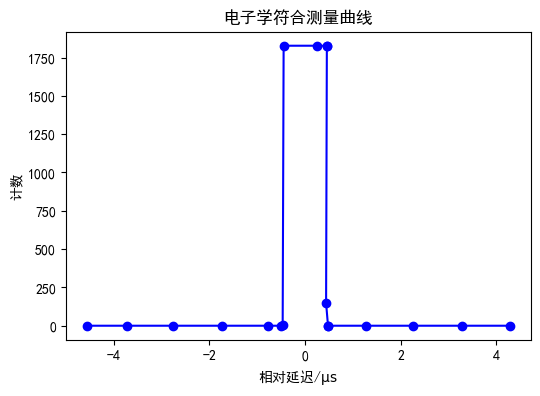

In [6]:
plt.figure(figsize=(6,4))
plt.plot(delay_re,count,'-o',color='blue')
plt.title('电子学符合测量曲线')
plt.xlabel(r'相对延迟/$\mathrm{\mu s}$')
plt.ylabel('计数')
plt.savefig(path+'Electronical Coincidence Curve.pdf')
plt.show()

In [7]:
left,right = np.where(np.logical_and(count<1800,count>3))[0]
tau_E = delay_re[right]-delay_re[left]

tau_E_up=delay_re[right+1]-delay_re[left-1]
tau_E_down=delay_re[right-1]-delay_re[left+1]

tau_E/=2
tau_E_up/=2
tau_E_down/=2

print(f'电子学符合分辨时间为{tau_E:.3f}+{tau_E_up-tau_E:.4f}{tau_E_down-tau_E:.4f}')

电子学符合分辨时间为0.454+0.0420-0.0020


# $\beta$ 旋钮定标

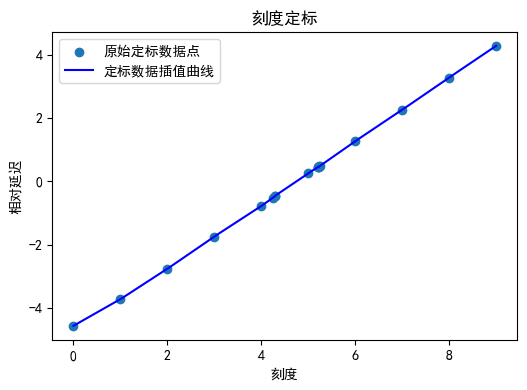

In [8]:
# interp = spip.interp1d(scale, delay)
interp_re = spip.interp1d(scale, delay_re)



x_interp = np.linspace(min(scale), max(scale), 1000)
y_interp = interp_re(x_interp)

plt.figure(figsize=(6,4))
plt.scatter(scale, delay_re, label='原始定标数据点')
plt.plot(x_interp, y_interp, label='定标数据插值曲线',color='blue')
plt.legend()
plt.xlabel('刻度')
plt.ylabel('相对延迟')
plt.title('刻度定标')
plt.savefig(path+'calibration_re.pdf')
plt.show()

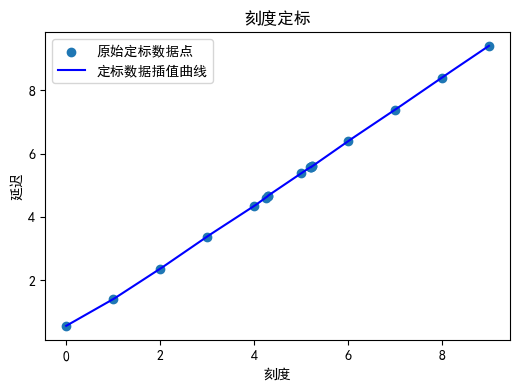

In [9]:
# interp = spip.interp1d(scale, delay)
interp = spip.interp1d(scale, delay)



x_interp = np.linspace(min(scale), max(scale), 1000)
y_interp = interp(x_interp)

plt.figure(figsize=(6,4))
plt.scatter(scale, delay, label='原始定标数据点')
plt.plot(x_interp, y_interp, label='定标数据插值曲线',color='blue')
plt.legend()
plt.xlabel('刻度')
plt.ylabel('延迟')
plt.title('刻度定标')
plt.savefig(path+'calibration.pdf')
plt.show()

# 物理学符合曲线

In [10]:
df = pd.read_excel('Data2.xlsx')
df=df.sort_values(by='beta延迟刻度')
df

,符合计数,beta计数,gamma计数,beta延迟刻度
0,0,1802,1968,0.0
1,0,1263,1847,1.0
2,0,1752,1900,2.0
3,1,1819,1937,3.0
4,0,1751,1989,4.0
5,2,1747,1921,4.2
6,23,1752,1916,4.3
7,171,1830,1904,4.4
8,142,1742,1802,4.5
9,182,1763,1979,4.6


In [11]:
# 先打表看看，为了后面反解定初值用
kedu=df['beta延迟刻度'].values
phi_delay_re=interp_re(kedu)
df['相对延迟']=phi_delay_re
df

,符合计数,beta计数,gamma计数,beta延迟刻度,相对延迟
0,0,1802,1968,0.0,-4.560000
1,0,1263,1847,1.0,-3.720000
2,0,1752,1900,2.0,-2.760000
3,1,1819,1937,3.0,-1.740000
4,0,1751,1989,4.0,-0.780000
5,2,1747,1921,4.2,-0.565600
6,23,1752,1916,4.3,-0.448000
7,171,1830,1904,4.4,-0.347429
8,142,1742,1802,4.5,-0.246857
9,182,1763,1979,4.6,-0.146286


物理学符合分辨时间(0.5796839021381577--0.4071938223938222)/2=0.49343886226598993


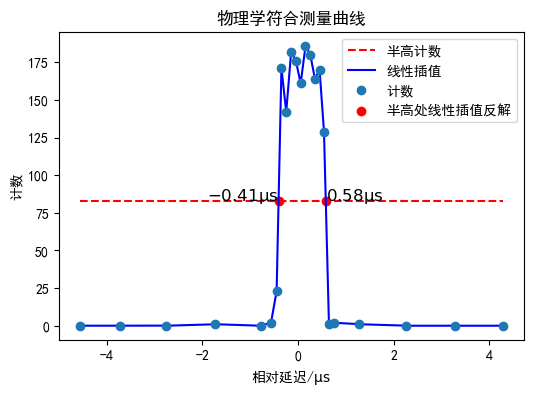

In [12]:
# 计算平均有效计数和半计数
phi_count = df['符合计数'].values
half_count=phi_count[np.where(phi_count>100)].mean()/2

# 曲线插值
phi_curve = spip.interp1d(phi_delay_re,phi_count )
start=np.min(phi_delay_re)
end=np.max(phi_delay_re)
x = np.linspace(start,end,1000)
y = phi_curve(x)

# 曲线展示
plt.figure(figsize=(6,4))
plt.hlines(half_count, start,end, color='r', linestyle='--',label='半高计数')
plt.plot(x,y,color='blue',label='线性插值')
plt.plot(phi_delay_re,phi_count,'o',label='计数')

# 半高全宽求解
phi_left = fsolve(lambda x:phi_curve(x)-half_count,-0.4)[0]
phi_right = fsolve(lambda x:phi_curve(x)-half_count,0.57)[0]
plt.scatter([phi_left,phi_right], [half_count,half_count], color='red', label='半高处线性插值反解')
plt.text(phi_left, half_count, fr'${phi_left:.2f} \mathrm{{\mu s}}$', fontsize=12, ha='right')
plt.text(phi_right, half_count, fr'${phi_right:.2f} \mathrm{{\mu s}}$', fontsize=12, ha='left')
tau_P = (phi_right-phi_left)/2
print(f'物理学符合分辨时间({phi_right}-{phi_left})/2={tau_P}')

plt.title('物理学符合测量曲线')
plt.xlabel(r'相对延迟/$\mathrm{\mu s}$')
plt.ylabel('计数')
plt.legend()
plt.savefig(path+'Physical Coincidence Curve.pdf')
plt.show()

# 符合法测量放射源活度

In [13]:
tau=tau_P*1e-6
# print(tau)

N_beta=1658
n_beta=N_beta/10
N_gamma=1858
n_gamma=N_gamma/10
N_c=166
n_c=N_c/10

n_betab_p_betagamma=5397/600
n_cb0=144/600

n_gammab=1059/10

n_beta0=n_beta-(n_betab_p_betagamma)
n_rc=2*tau*n_beta0*n_gamma
n_c0=n_c-n_rc-2*tau*n_betab_p_betagamma*n_gamma

A=(n_beta-n_betab_p_betagamma)*(n_gamma-n_gammab)/(n_c-n_rc-n_cb0)
print(f'放射源活度为:{A}')
# print(f'{A*60:e}')
# 1.5e5/60


放射源活度为:767.162408277943


In [14]:
print(f'{n_rc}/{n_c0}={n_rc/n_c0}')
print(f'{n_cb0}/{n_c0}={n_cb0/n_c0}')

0.028752059784395056/16.56959860009405=0.0017352297106480211
0.24/16.56959860009405=0.014484358118285239


In [15]:
nu_beta=1/np.sqrt(N_beta)
nu_gamma=1/np.sqrt(N_gamma)
nu_c=1/np.sqrt(N_c)
print(f'nu_beta={nu_beta:.3e},nu_gamma={nu_gamma:.3e},nu_c={nu_c:.3e}')
nu=np.sqrt(nu_beta**2+nu_gamma**2+nu_c**2)
print(f'nu={nu:.3e}')

nu=np.sqrt(1/N_beta+1/N_gamma+1/N_c)


nu_beta=2.456e-02,nu_gamma=2.320e-02,nu_c=7.762e-02
nu=8.465e-02


In [17]:
string_result(A,A*nu)

'(7.7 ± 0.6 )×10^2'

# 真偶符合比


\begin{gather*}
n_{c0} =\varepsilon _{1} \varepsilon _{2} A\\
n_{rc} =2\tau \varepsilon _{1} \varepsilon _{2} A^{2}\\
n_{rc} /n_{c0} =2\tau A\\
\text{真偶符合比} =\frac{n_{c0}}{n_{rc}} =\frac{1}{2\tau A}
\end{gather*}

In [234]:
n_c0/n_rc
# 1/(2*tau*A)


576.2925760570052